***

# GTI770 - Systèmes Intelligents et Apprentissage Machine

#### Alessandro L. Koerich

### Notebook Jupyter - 5_Decision_Trees - Weather Dataset - Nominal Features

##### Created: Jan 2019

***

In [1]:
# Imports
import numpy as np

# to visualize the tree you must install this library
# conda install python-graphviz OR pip install graphviz
import graphviz
import pydotplus

# import from skit-learn
from sklearn import tree

# import
import csv

In [2]:
# Create and manipulate dataframes
import pandas

In [3]:
# Load data from file
# File with 4 nominal features from Weather
data_frame = pandas.read_csv("CSV_files/weather.nominal.arff.csv", delimiter=',')

In [4]:
data_frame

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [5]:
data_frame.columns

Index(['outlook', 'temperature', 'humidity', 'windy', 'play'], dtype='object')

## Ordinal and Nominal Features with Scikit-Learn

### Scikit-Learn only supports numerical features. Therefore, it is necessary to prepare the features.

- LabelEncoder: can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine.
- One-Hot-Encoding: the result is binary rather than ordinal and that everything sits in an orthogonal vector space. 

### LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data_frame_le = data_frame.copy()

data_frame_le['outlook']     = labelencoder.fit_transform(data_frame['outlook'].values)
data_frame_le['temperature'] = labelencoder.fit_transform(data_frame['temperature'].values)
data_frame_le['humidity']    = labelencoder.fit_transform(data_frame['humidity'].values)
data_frame_le['windy']       = labelencoder.fit_transform(data_frame['windy'].values)
data_frame_le.drop(['play'], axis = 1, inplace = True) # removing the class....

In [7]:
data_frame_le

,outlook,temperature,humidity,windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [8]:
data_frame_le.columns

Index(['outlook', 'temperature', 'humidity', 'windy'], dtype='object')

### One-Hot-Encoding

#### Please, notice that here we are not using the "One-Hot-Encoding" from Scikit-learn, but "get_dummies" from pandas.

In [9]:
data_frame_ohe = pandas.get_dummies(data_frame[['outlook', 'temperature', 'humidity', 'windy']])

In [10]:
data_frame_ohe

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_strong,windy_weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [11]:
data_frame_ohe.columns

Index(['outlook_overcast', 'outlook_rainy', 'outlook_sunny',
       'temperature_cool', 'temperature_hot', 'temperature_mild',
       'humidity_high', 'humidity_normal', 'windy_strong', 'windy_weak'],
      dtype='object')

## Training a Decision Tree
### data_frame_le OR data_frame_ohe
#### You must choose one 

In [12]:
# Define the training set
# You may chose either data_frame_ohe OR data_frame_le

# X_train  = data_frame_le
X_train  = data_frame_ohe

Y_train  = data_frame['play']

In [13]:
X_train

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_strong,windy_weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [14]:
Y_train

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

### Scikit-Learn Decision Trees Documentation

#### Read the documentation about Decision Trees

http://scikit-learn.org/stable/modules/tree.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [15]:
# Train the Decision Tree with the training set
# There are several parameters that can be chosen.
# Here, we use the default parameters
model    = tree.DecisionTreeClassifier( criterion='entropy', max_depth = 5)
DT_model = model.fit(X_train, Y_train)

In [16]:
# Show all parameters of the model Decision Tree
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
# Here, we can set all these parameters
# You can change all of them 
# See the documentation
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

model = tree.DecisionTreeClassifier(class_weight = None,
                                    criterion = 'gini',
                                    max_depth = None,
                                    max_features = None,
                                    max_leaf_nodes = None,
                                    min_impurity_decrease = 0.0,
                                    min_impurity_split = None,
                                    min_samples_leaf  = 1,
                                    min_samples_split = 2,
                                    min_weight_fraction_leaf = 0.0,
                                    presort = False,
                                    random_state = None,
                                    splitter = 'best'
                                   )

In [18]:
# If you have trouble to visualize the decision tree, give a look at graphviz documentation
# https://graphviz.readthedocs.io/en/stable/manual.html

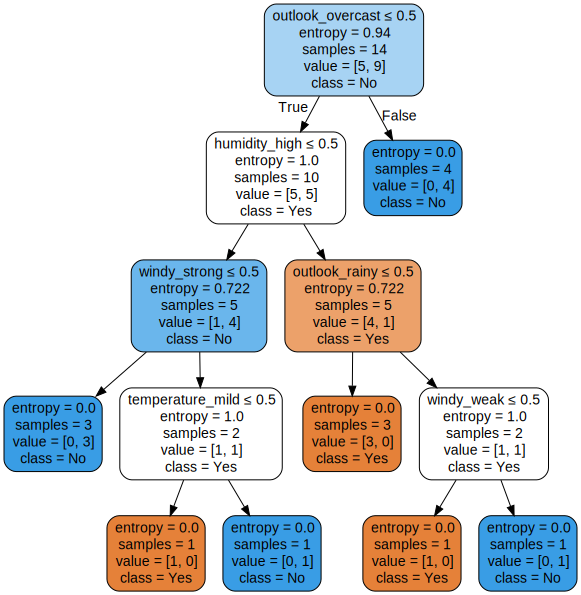

In [20]:
# Visualize the tree in jupyter and save it in a svg file
dot_data = tree.export_graphviz(DT_model,
                                out_file = None, 
                                feature_names = data_frame_ohe.columns,  
                                #feature_names = data_frame_le.columns,  
                                class_names   = ['Yes', 'No'],
                                filled  = True,
                                rounded = True,  
                                special_characters = True
                               )

graph = graphviz.Source(dot_data)
graph.format = 'svg'
graph.render("Weather_Data") 
graph 

In [ ]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset. This is not far. To have a realist mesure of the performance we need to
# test our model on new data (different from the training data)
Y_train_pred = DT_model.predict( X_train )
Y_train_pred

In [ ]:
# You can also predict the probability of each class
# train dataset
Y_train_pred_prob = DT_model.predict_proba( X_train )
Y_train_pred_prob

In [ ]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
acc_simpsons_train = accuracy_score(Y_train, Y_train_pred )
print("Correct classification rate for the training dataset = "+str(acc_simpsons_train*100)+"%")

***
## Scikit-learn has three different APIs for evaluating the quality of a model’s predictions:

### More details in: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
***

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['Yes', 'No']
print( classification_report(Y_train, Y_train_pred, target_names=target_names))

In [ ]:
cm_simpsons_train = confusion_matrix(Y_train, Y_train_pred )
cm_simpsons_train

In [ ]:
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
np.set_printoptions(precision = 2)

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_simpsons_train,
                      classes = ['Yes', 'No'],
                      title = 'Confusion matrix, without normalization - training set')

In [ ]:
plt.show()

In [ ]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_simpsons_train,
                      classes = ['Yes', 'No'],
                      normalize = True,
                      title = 'Confusion matrix, with normalization - training set')

In [ ]:
plt.show()

In [ ]:
print("Notebook ended")